# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
##Additional libraries
#!pip install seaborn
import seaborn as sns
#!pip install matplotlib
import matplotlib.pyplot as plt



In [3]:
## Imports to enable the model training
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

### The Capstone project of this course will follow the steps below:
a) Dataset load into a Jupyter Notebook environment.

b) Explore, profile and clean the datasets


c) Deeply analysis on data applying Pearson correlation and creating other visual 
analysis 

d) Create Train and Test samples to be applied to the models purposed


e) Benchmark the purposed models evaluating its results with the statistical test 
mentioned.


f) Conclude the project with final considerations of the analysis enabled by the 
explorations, and test results.


## A) Data Ingestion and source data profiling

This step will profile the original data source in order to bring insights towards the data analyzed.

## A.1) Analyzing each dataset

### A.1.a) Portfolio dataset

First data observed is the portfolio dataset. This dataset contains the offer  types and its channels. Ranking it by difficulty, duration and reward, it is possible to say that which offer type is possible to set following statements:

* We have different difficulty levels, durations and rewards for each type bringing a variety of possible offers with multiple sort of channels used for each.
* The most difficult discounts are the web, email used channels to submit and 10 days duration with 5 reward given, when we also have a BOGO (buy one get one) offer where brings more reward (10) to the user when claimed with less difficulty, yet having less duration.


Continuing with our last previous statements, they lead us to compreehend that we have the prososal is able to be predicted as we have a wide service basket of offers that, merged with our fact table (the transaction transcript file) we will better describe each transaction offer.


In [4]:
portfolio.head(10).sort_values(by=['difficulty','duration','reward',], ascending=False)

,channels,difficulty,duration,id,offer_type,reward
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0


In [5]:
portfolio.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
difficulty,10.0,7.7,5.831905,0.0,5.0,8.5,10.0,20.0
duration,10.0,6.5,2.321398,3.0,5.0,7.0,7.0,10.0
reward,10.0,4.2,3.583915,0.0,2.0,4.0,5.0,10.0


In [6]:
portfolio['offer_type'].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [7]:
portfolio.count()

channels      10
difficulty    10
duration      10
id            10
offer_type    10
reward        10
dtype: int64

In [8]:
portfolio.dtypes

channels      object
difficulty     int64
duration       int64
id            object
offer_type    object
reward         int64
dtype: object

Finalizing this assess, we might say that we have 10 distinct offers with 4 different offer types.

### A.1.b) Profile dataset

This dataset contains the client profile. We can analyse this data detailing and understand different gender's customer income by age. We could use this data to train models to predict best offer to be sending to each customer based on age, gender and income. 

In [9]:
profile.head(10)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN


In [10]:
profile.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,17000.0,6.253141e+01,26.738580,18.0,45.0,58.0,73.0,118.0
became_member_on,17000.0,2.016703e+07,11677.499961,20130729.0,20160526.0,20170802.0,20171230.0,20180726.0
income,14825.0,6.540499e+04,21598.299410,30000.0,49000.0,64000.0,80000.0,120000.0


In [11]:
profile.count()

age                 17000
became_member_on    17000
gender              14825
id                  17000
income              14825
dtype: int64

In [12]:
profile.dtypes

age                   int64
became_member_on      int64
gender               object
id                   object
income              float64
dtype: object

In [13]:
profile.gender.unique()


array([None, 'F', 'M', 'O'], dtype=object)

In [14]:

percent_female = (len(profile[profile['gender']=='F'])/len(profile['gender']))*100
print(percent_female)

percent_none = (len(profile[profile['gender'].isna()])/len(profile['gender']))*100
print(percent_none)

percent_male = (len(profile[profile['gender']=='M'])/len(profile['gender']))*100
print(percent_male)

percent_others = (len(profile[profile['gender']=='O'])/len(profile['gender']))*100
print(percent_others)

list_gender = [percent_female, percent_male, percent_others, percent_none]
labels = ['Female', 'Male', 'Others', 'None']
print(list_gender)




36.05294117647059
12.794117647058822
49.90588235294118
1.2470588235294118
[36.05294117647059, 49.90588235294118, 1.2470588235294118, 12.794117647058822]


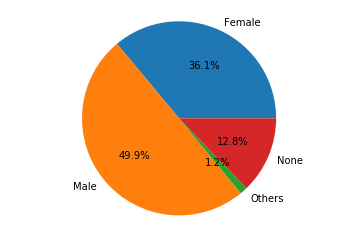

In [15]:


# Pie chart, where the slices will be ordered and plotted counter-clockwise:

fig1, ax1 = plt.subplots()
ax1.pie(list_gender, labels=labels, autopct='%1.1f%%',
        shadow=False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Here you can see that we have 4 types of possible gender clusters. People who do not do not informs its gender, people who considers themselves as females, others as males, and, also, as other self identity understanding/being.


To deepen the first exploratory phase, analysing each gender, we can check if we find any inconsistency to help us comprenhend the data.

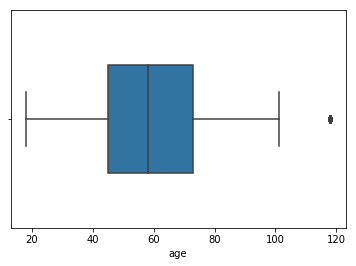

In [16]:
sns.boxplot(profile['age'], width=0.5);

We have an outlier mass under age 120 and more granular to this case in order to understand this outlier

In [17]:
female_cust_profile = profile[profile['gender']=='F']
female_cust_profile.head(5)

,age,became_member_on,gender,id,income
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
13,61,20170911,F,aa4862eba776480b8bb9c68455b8c2e1,57000.0
15,62,20160211,F,31dda685af34476cad5bc968bdb01c53,71000.0
19,61,20180501,F,a448667f336b42c9a66fc5ffd5d73772,40000.0


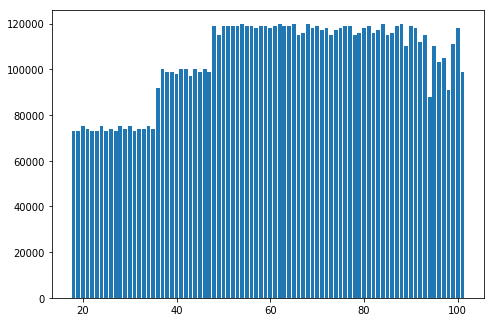

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(female_cust_profile.age,female_cust_profile.income)
plt.show()

In [19]:
male_cust_profile = profile[profile['gender']=='M']
male_cust_profile.head(5)

,age,became_member_on,gender,id,income
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
12,58,20171111,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0
14,26,20140213,M,e12aeaf2d47d42479ea1c4ac3d8286c6,46000.0
16,49,20141113,M,62cf5e10845442329191fc246e7bcea3,52000.0


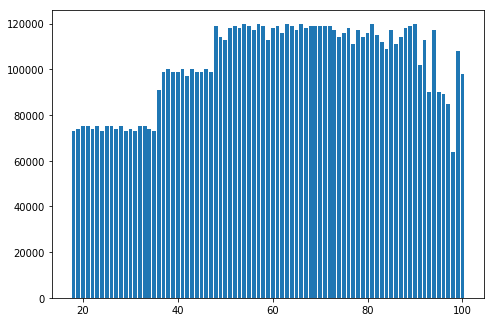

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(male_cust_profile.age,male_cust_profile.income)
plt.show()

In [21]:
other_cust_profile = profile[profile['gender']=='O']
other_cust_profile.head(5)

,age,became_member_on,gender,id,income
31,53,20170916,O,d1ede868e29245ea91818a903fec04c6,52000.0
273,60,20180216,O,d0be9ff460964c3398a33ad9b2829f3a,94000.0
383,49,20171207,O,0d0a9ca9281248a8a35806c9ae68f872,42000.0
513,63,20150920,O,01f46a5191424005af436cdf48a5da7c,89000.0
576,73,20180316,O,644ac06dc9b34a5bbd237a465cf47571,88000.0


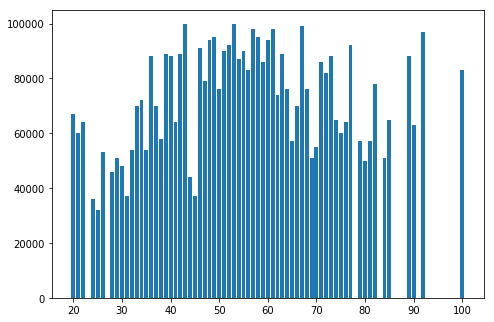

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(other_cust_profile.age,other_cust_profile.income)
plt.show()

In [23]:
none_gend_cust_profile = profile[profile['gender'].isna()]
none_gend_cust_profile.head(10)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN
10,118,20170824,None,c4863c7985cf408faee930f111475da3,NaN
11,118,20150919,None,148adfcaa27d485b82f323aaaad036bd,NaN
17,118,20170801,None,744d603ef08c4f33af5a61c8c7628d1c,NaN
23,118,20170907,None,2b826eba31074a059d63b0ae8f50b7d5,NaN


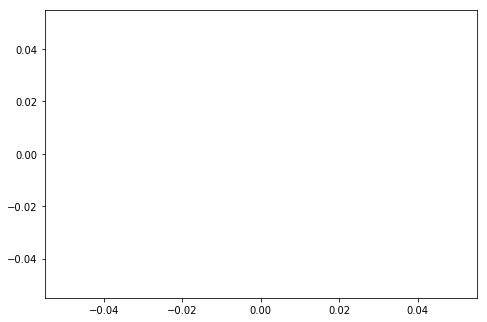

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(none_gend_cust_profile.age,none_gend_cust_profile.income)
plt.show()

We can unconsider the None fulffilled genders because they do not have crucial information, as the age informed is also a default value. This item shall be removed on the next part where the data will be cleanse for feature engineering.

### A.1.c) Transcript dataset

This dataset contains each transaction made being related to what type of offer for each customer , and what type of event occured after the offer being submitted.

In [25]:
transcript.head(5)


,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [26]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

In [27]:

transcript.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
time,306534.0,366.38294,200.326314,0.0,186.0,408.0,528.0,714.0


In [28]:
transcript.count()

event     306534
person    306534
time      306534
value     306534
dtype: int64

In [29]:
transcript.dtypes

event     object
person    object
time       int64
value     object
dtype: object

In [30]:
transcript_offer_received_count = len(transcript[transcript['event'] == 'offer received'])
print(transcript_offer_received_count)

transcript_offer_viewed_count = len(transcript[transcript['event'] == 'offer viewed'])
print(transcript_offer_viewed_count)

transcript_transaction_count = len(transcript[transcript['event'] == 'transaction'])
print(transcript_transaction_count)

transcript_offer_completed_count = len(transcript[transcript['event'] == 'offer completed'])
print(transcript_offer_completed_count)

list_count_offers = [transcript_offer_received_count, 
                     transcript_offer_viewed_count, transcript_transaction_count, transcript_offer_completed_count]
description = ['offer received', 'offer viewed', 'transaction', 'offer completed']
print(description)





76277
57725
138953
33579
['offer received', 'offer viewed', 'transaction', 'offer completed']


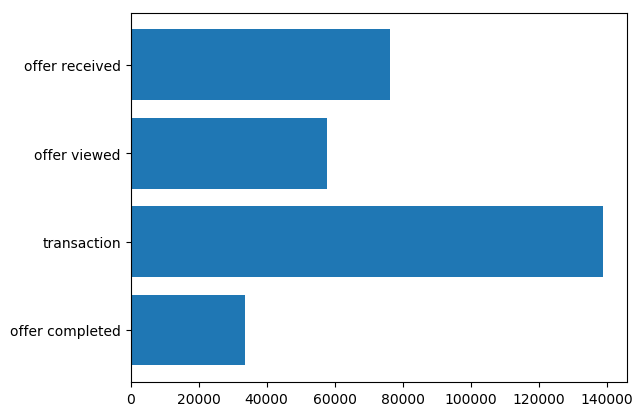

In [31]:


plt.rcdefaults()
fig, ax = plt.subplots()

ypos = np.arange(len(description))

ax.barh(ypos, list_count_offers, align='center')
ax.set_yticks(np.arange(len(description)))
ax.set_yticklabels(description)
ax.invert_yaxis()  # labels read top-to-bottom

plt.show()

There are 4 possible transaction types where the  model could be based on. But further we will explore the data to feature engineering the model will have a final dataset shaped to it.

## B) Data Cleanse and Final dataset preparation

As we can see, we have many possible to be correlated data but first, we must clean the data bringing creating a standard column name and using suitable data types for each field. I.e, this part is focused on transforming and renaming columns (e.g. a time field with 'int64' will be transformed as a 'date' format, and other necessary transformations will be done here to create the final dataset to enable us to properly feature engineer our train and test datasets. 

After transforming the original datasets, we will merge the classificatory data from the profile and portfolio original datasets to the transcript fact dataset.

In [32]:
'''First of all creating a def that will be used in the cleanse and name standarization of each data set.'''
def rename_cols(df, new_name_cols):

    df= df.rename(columns = new_name_cols)
    return df

### B.1.a) Portfolio dataset cleanse

In [33]:
new_name_cols = {'difficulty':'offer_difficulty','duration':'offer_duration','id':'offer_id','reward':'offer_reward'}
stg_portfolio = rename_cols(portfolio,new_name_cols)
stg_portfolio.head(10)

,channels,offer_difficulty,offer_duration,offer_id,offer_type,offer_reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


We will need to unpivot the channel types in order to have this information being obtained into the final dataset which consists of all three bases merged.

In [34]:
stg_portfolio.dtypes

channels            object
offer_difficulty     int64
offer_duration       int64
offer_id            object
offer_type          object
offer_reward         int64
dtype: object

This dataset could be now be considered staged for processing as we have easily the fields renamed for a better understanding and with each of it with the correct data type.

### B.1.b) Profile dataset cleanse

In [35]:
new_name_cols = {'age':'customer_age','gender':'customer_gender','id':'customer_id','income':'customer_income'}
stg_profile = rename_cols(profile,new_name_cols)
stg_profile.head(5)

,customer_age,became_member_on,customer_gender,customer_id,customer_income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [36]:
stg_profile.dtypes

customer_age          int64
became_member_on      int64
customer_gender      object
customer_id          object
customer_income     float64
dtype: object

First of all, we must remove the outlier encountered at the source data profiling phase.

In [37]:
stg_profile = stg_profile.dropna()

In [38]:
stg_profile.customer_gender.unique()

array(['F', 'M', 'O'], dtype=object)

The second staging needed is to transform 'became_member_on' field from integer to date data type

In [39]:
stg_profile['became_member_on']= pd.to_datetime(stg_profile['became_member_on'], format='%Y%m%d')

In [40]:
stg_profile.dtypes

customer_age                 int64
became_member_on    datetime64[ns]
customer_gender             object
customer_id                 object
customer_income            float64
dtype: object

In [41]:
stg_profile.head(5)

,customer_age,became_member_on,customer_gender,customer_id,customer_income
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0
12,58,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0


Also, thinking on further analysis, the customer age could be grouped for possible correlations or descriptive analysis.
The age groups could following pattern of 5 years per group clunch. 
* Until 18
* 19 - 28
* 29 - 38
* 39 - 48
* 49 - 58
* 59 - 68
* 69 - 78
* 79 - 88
* Above 89

In [42]:
def age_group_clf(df):
    
    #add Age_group column
    df.loc[(df.customer_age <= 18) , 'age_group'] = 'Until 18'
    df.loc[(df.customer_age >= 19) & (df.customer_age  <= 28) , 'age_group'] = '19-28'
    df.loc[(df.customer_age >= 29) & (df.customer_age  <= 38) , 'age_group'] = '29-38'
    df.loc[(df.customer_age >= 49) & (df.customer_age  <= 58) , 'age_group'] = '49-58'
    df.loc[(df.customer_age >= 59) & (df.customer_age  <= 68) , 'age_group'] = '59-68'
    df.loc[(df.customer_age >= 69) & (df.customer_age  <= 78) , 'age_group'] = '69-78'
    df.loc[(df.customer_age >= 79) & (df.customer_age  <= 88) , 'age_group'] = '79-88'
    df.loc[(df.customer_age >= 89) , 'age_group'] = 'Above 89'
    

    return df

In [43]:
age_group_clf(stg_profile)
stg_profile.head(5)

,customer_age,became_member_on,customer_gender,customer_id,customer_income,age_group
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,49-58
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,69-78
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,59-68
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0,59-68
12,58,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,49-58


This dataset could be now be considered staged for processing as we have easily the fields renamed for a better understanding and with each of it with the correct data type.

### B.1.c) Transcript dataset cleanse

In [44]:
new_name_cols = {'person':'customer_id'}
stg_transcript = rename_cols(transcript,new_name_cols)
stg_transcript

,event,customer_id,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


We may also need to clean the each prior value field (now renamed as offer_id) to obtain each offer_id hash to further merge this field with portofolio primary key. Also we can obtain more information about each offer such as ammount and reward by unpivoting those dictonaries.

In [45]:
def unpivot_transcript(df):
    
    #Unpivoting dictonary
    df['offer_id']  = df['value'].apply(lambda x: x.get('offer_id'))
    df['offer id']  = df['value'].apply(lambda x: x.get('offer id'))
    df['reward'] = df['value'].apply(lambda x: x.get('reward'))
    df['amount'] = df['value'].apply(lambda x: x.get('amount'))
    
    #Matching the 'offer_id' and 'offer id' fields into one:
    df['offer_id'] = df.apply(lambda x : x['offer id'] if x['offer_id'] == None else x['offer_id'], axis=1)
    #Cleanning unused columns
    df.drop(['value','offer id'], axis=1, inplace = True )
    #Filling NaN values
    df.fillna(0,inplace=True)


    return df

In [46]:
unpivot_transcript(stg_transcript)
stg_transcript.head(5)

,event,customer_id,time,offer_id,reward,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0.0,0.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,0.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0.0


This dataset could be now be considered staged for processing as we have easily the fields renamed for a better understanding and with each of it with the correct data type.

## B.2) Exploratory Analysis

To better explore the relations between the datasets, we can wrangle the data merging each staged dataset to create the final dataset where we will better understand data correlation and distributions

### B.2.a) Merging the datasets

In [47]:
def merge_data(df1,df2,merge_key2,df3,merge_key3):
    final_dataset = pd.merge(df1, df2 , on=merge_key2)
    final_dataset = pd.merge(final_dataset,df3,on=merge_key3)
    
    print("Merge Successful!")
    

    return final_dataset

In [48]:
prepared_df =  merge_data(stg_transcript,stg_portfolio,['offer_id'],stg_profile,['customer_id'])

Merge Successful!


As a result of this cleanse and preparation, we obtained our final dataset that will be used for feature engineering.

## C) Exploratory analysis and feature engineer

With the clean, pre-prepared and consolidated final dataset, we can start explore the data and its correlations, with more descriptive analysis in order to ease the efforts choosing featured information to create our train and test datasets.

It may be necessary to create dummies and even model our data a bit. However, we will now have a final staged dataset that has had its integrity guaranteed by parts 'A' and 'B'.

In [49]:
prepared_df.offer_type.unique()


array(['bogo', 'informational', 'discount'], dtype=object)

In [50]:
prepared_df.event.unique()

array(['offer received', 'offer viewed', 'offer completed'], dtype=object)

In [51]:
prepared_df.describe()

,time,reward,amount,offer_difficulty,offer_duration,offer_reward,customer_age,customer_income
count,148805.000000,148805.000000,148805.0,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000
mean,354.570223,1.078868,0.0,7.890561,6.625207,4.442445,54.779282,66414.119149
std,198.311301,2.452545,0.0,5.041335,2.133035,3.372362,17.193533,21496.947967
min,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,18.000000,30000.000000
25%,168.000000,0.000000,0.0,5.000000,5.000000,2.000000,43.000000,51000.000000
50%,408.000000,0.000000,0.0,10.000000,7.000000,5.000000,56.000000,65000.000000
75%,510.000000,0.000000,0.0,10.000000,7.000000,5.000000,67.000000,81000.000000
max,714.000000,10.000000,0.0,20.000000,10.000000,10.000000,101.000000,120000.000000


In [52]:
prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 148804
Data columns (total 16 columns):
event               148805 non-null object
customer_id         148805 non-null object
time                148805 non-null int64
offer_id            148805 non-null object
reward              148805 non-null float64
amount              148805 non-null float64
channels            148805 non-null object
offer_difficulty    148805 non-null int64
offer_duration      148805 non-null int64
offer_type          148805 non-null object
offer_reward        148805 non-null int64
customer_age        148805 non-null int64
became_member_on    148805 non-null datetime64[ns]
customer_gender     148805 non-null object
customer_income     148805 non-null float64
age_group           126955 non-null object
dtypes: datetime64[ns](1), float64(3), int64(5), object(7)
memory usage: 19.3+ MB


### C.1) Exploratory Analysis

#### Gender customer participation:

In [53]:

percent_f = (len(prepared_df[prepared_df['customer_gender']=='F'])/len(prepared_df['customer_gender']))*100
print(percent_female)

percent_m = (len(prepared_df[prepared_df['customer_gender']=='M'])/len(prepared_df['customer_gender']))*100
print(percent_male)

percent_o = (len(prepared_df[prepared_df['customer_gender']=='O'])/len(prepared_df['customer_gender']))*100
print(percent_others)

list_gender = [percent_f, percent_m, percent_o]
labels = ['Female', 'Male', 'Others']
print(list_gender)




36.05294117647059
49.90588235294118
1.2470588235294118
[42.82046974228017, 55.707805517287724, 1.4717247404321092]


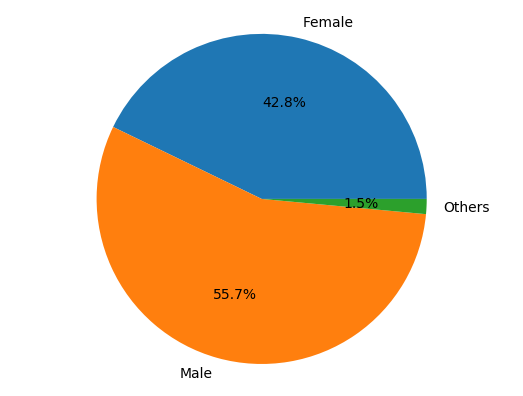

In [54]:


# Pie chart, where the slices will be ordered and plotted counter-clockwise:

fig1, ax1 = plt.subplots()
ax1.pie(list_gender, labels=labels, autopct='%1.1f%%',
        shadow=False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

As the first data adequation found in the previous step, the outlier data was removed from the modelling in order to do not skew the train datasets.

#### Income Distribution

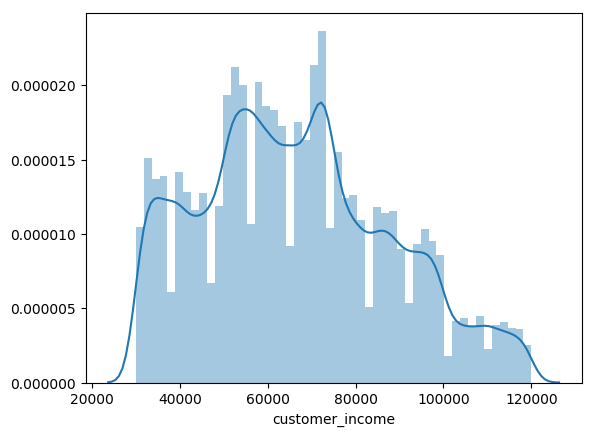

In [55]:
sns.distplot(prepared_df['customer_income'], bins=50, hist_kws={'alpha': 0.4})

For a better modeling, this should be standardized for better train results.

In [56]:
prepared_df['customer_income'].median()

65000.0

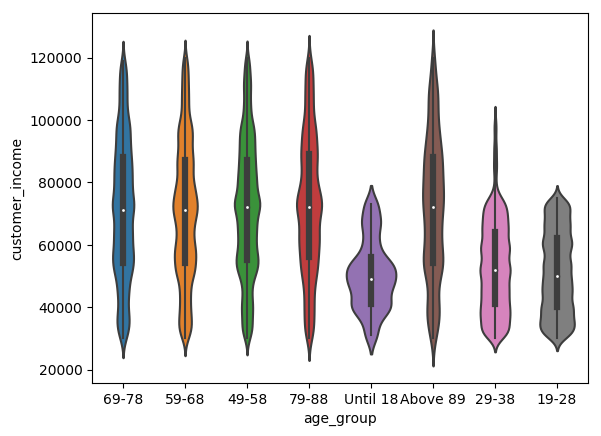

In [57]:
ax = sns.violinplot(x="age_group",y="customer_income", data=prepared_df)

In [58]:
prepared_df.groupby('age_group').median()

,time,reward,amount,offer_difficulty,offer_duration,offer_reward,customer_age,customer_income
age_group,,,,,,,,
19-28,408,0.0,0.0,10,7,3,24,50000.0
29-38,408,0.0,0.0,10,7,5,34,52000.0
49-58,408,0.0,0.0,10,7,5,54,72000.0
59-68,408,0.0,0.0,10,7,5,63,71000.0
69-78,408,0.0,0.0,10,7,5,73,71000.0
79-88,408,0.0,0.0,10,7,5,82,72000.0
Above 89,408,0.0,0.0,10,7,5,92,72000.0
Until 18,408,0.0,0.0,7,7,5,18,49000.0


In [59]:
prepared_df.groupby('age_group').mean()

,time,reward,amount,offer_difficulty,offer_duration,offer_reward,customer_age,customer_income
age_group,,,,,,,,
19-28,351.644403,0.840819,0.0,7.748662,6.578621,4.431309,23.624777,51322.628190
29-38,353.653838,0.952546,0.0,7.814137,6.618600,4.445661,33.960314,53369.182967
49-58,354.329444,1.142167,0.0,7.942218,6.640799,4.431247,53.690598,71624.692943
59-68,354.855572,1.126197,0.0,7.961547,6.660084,4.441404,63.286676,70851.274922
69-78,356.088903,1.123511,0.0,7.889804,6.618433,4.438711,72.911512,71497.254171
79-88,357.104373,1.177009,0.0,7.805213,6.584578,4.413458,82.801505,72621.878067
Above 89,358.475843,1.177454,0.0,7.966576,6.610149,4.529626,92.539654,71976.906715
Until 18,359.362275,0.874251,0.0,7.323353,6.362275,4.252994,18.000000,50380.239521


##### Findings:

Our general median income is 65,000.00.
The customer income differs by age group where older groups presents more median income.

##### Offer Distribution:

In [60]:
offer_type_bogo = len(prepared_df[prepared_df['offer_type'] == 'bogo'])
offer_type_bogo_percent = (len(prepared_df[prepared_df['offer_type'] == 'bogo'])/len(prepared_df))*100
print(transcript_offer_received_count)
print(offer_type_bogo_percent)

offer_type_info = len(prepared_df[prepared_df['offer_type'] == 'informational'])
offer_type_info_percent = (len(prepared_df[prepared_df['offer_type'] == 'informational'])/len(prepared_df))*100
print(transcript_offer_viewed_count)
print(offer_type_info_percent)

offer_type_disc = len(prepared_df[prepared_df['offer_type'] == 'discount'])
offer_type_disc_percent = (len(prepared_df[prepared_df['offer_type'] == 'discount'])/len(prepared_df))*100
print(transcript_transaction_count)
print(offer_type_disc_percent)


list_count_offers = [offer_type_bogo,offer_type_info,offer_type_disc]
list_percent_offers =  [offer_type_bogo_percent,offer_type_info_percent,offer_type_disc_percent]
description = ['BOGO', 'Info', 'Discount']

76277
42.89775209166359
57725
15.227982930681092
138953
41.87426497765532


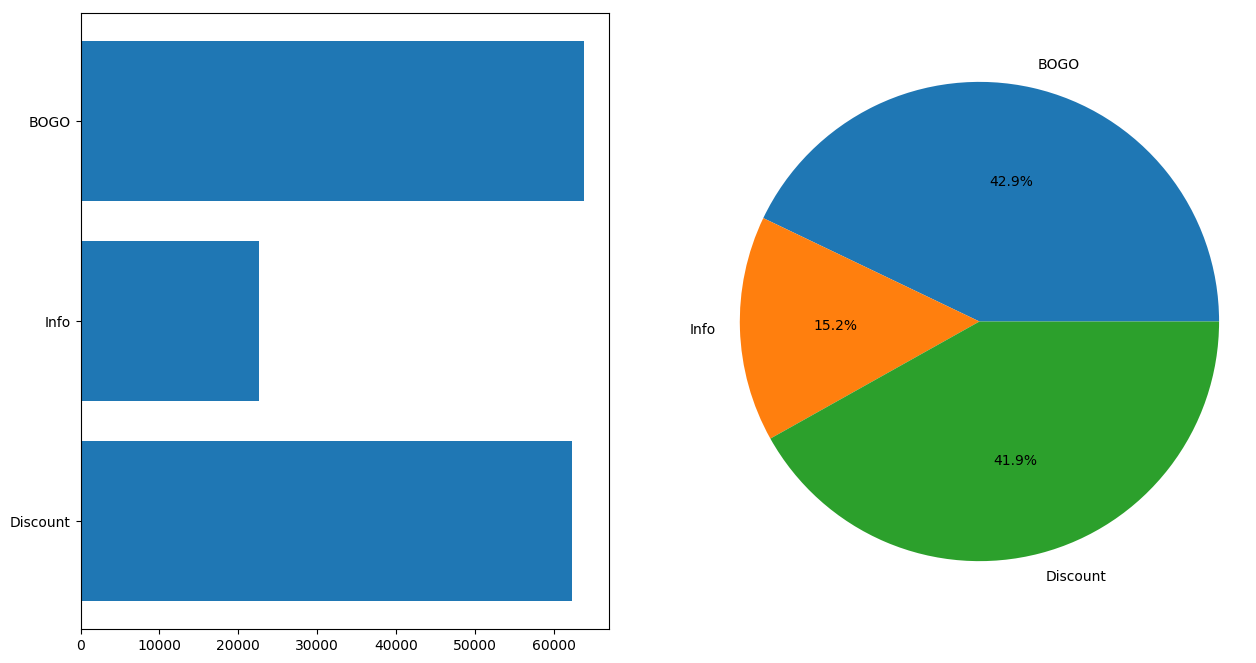

In [61]:
plt.rcdefaults()
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ypos = np.arange(len(description))
##Bar plot to count registers 
ax[0].barh(ypos, list_count_offers, align='center')
ax[0].set_yticks(np.arange(len(description)))
ax[0].set_yticklabels(description)
ax[0].invert_yaxis()  # labels read top-to-bottom

#Pie plot to show offer share
ax[1].pie(list_percent_offers, labels=description, autopct='%1.1f%%',
        shadow=False)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


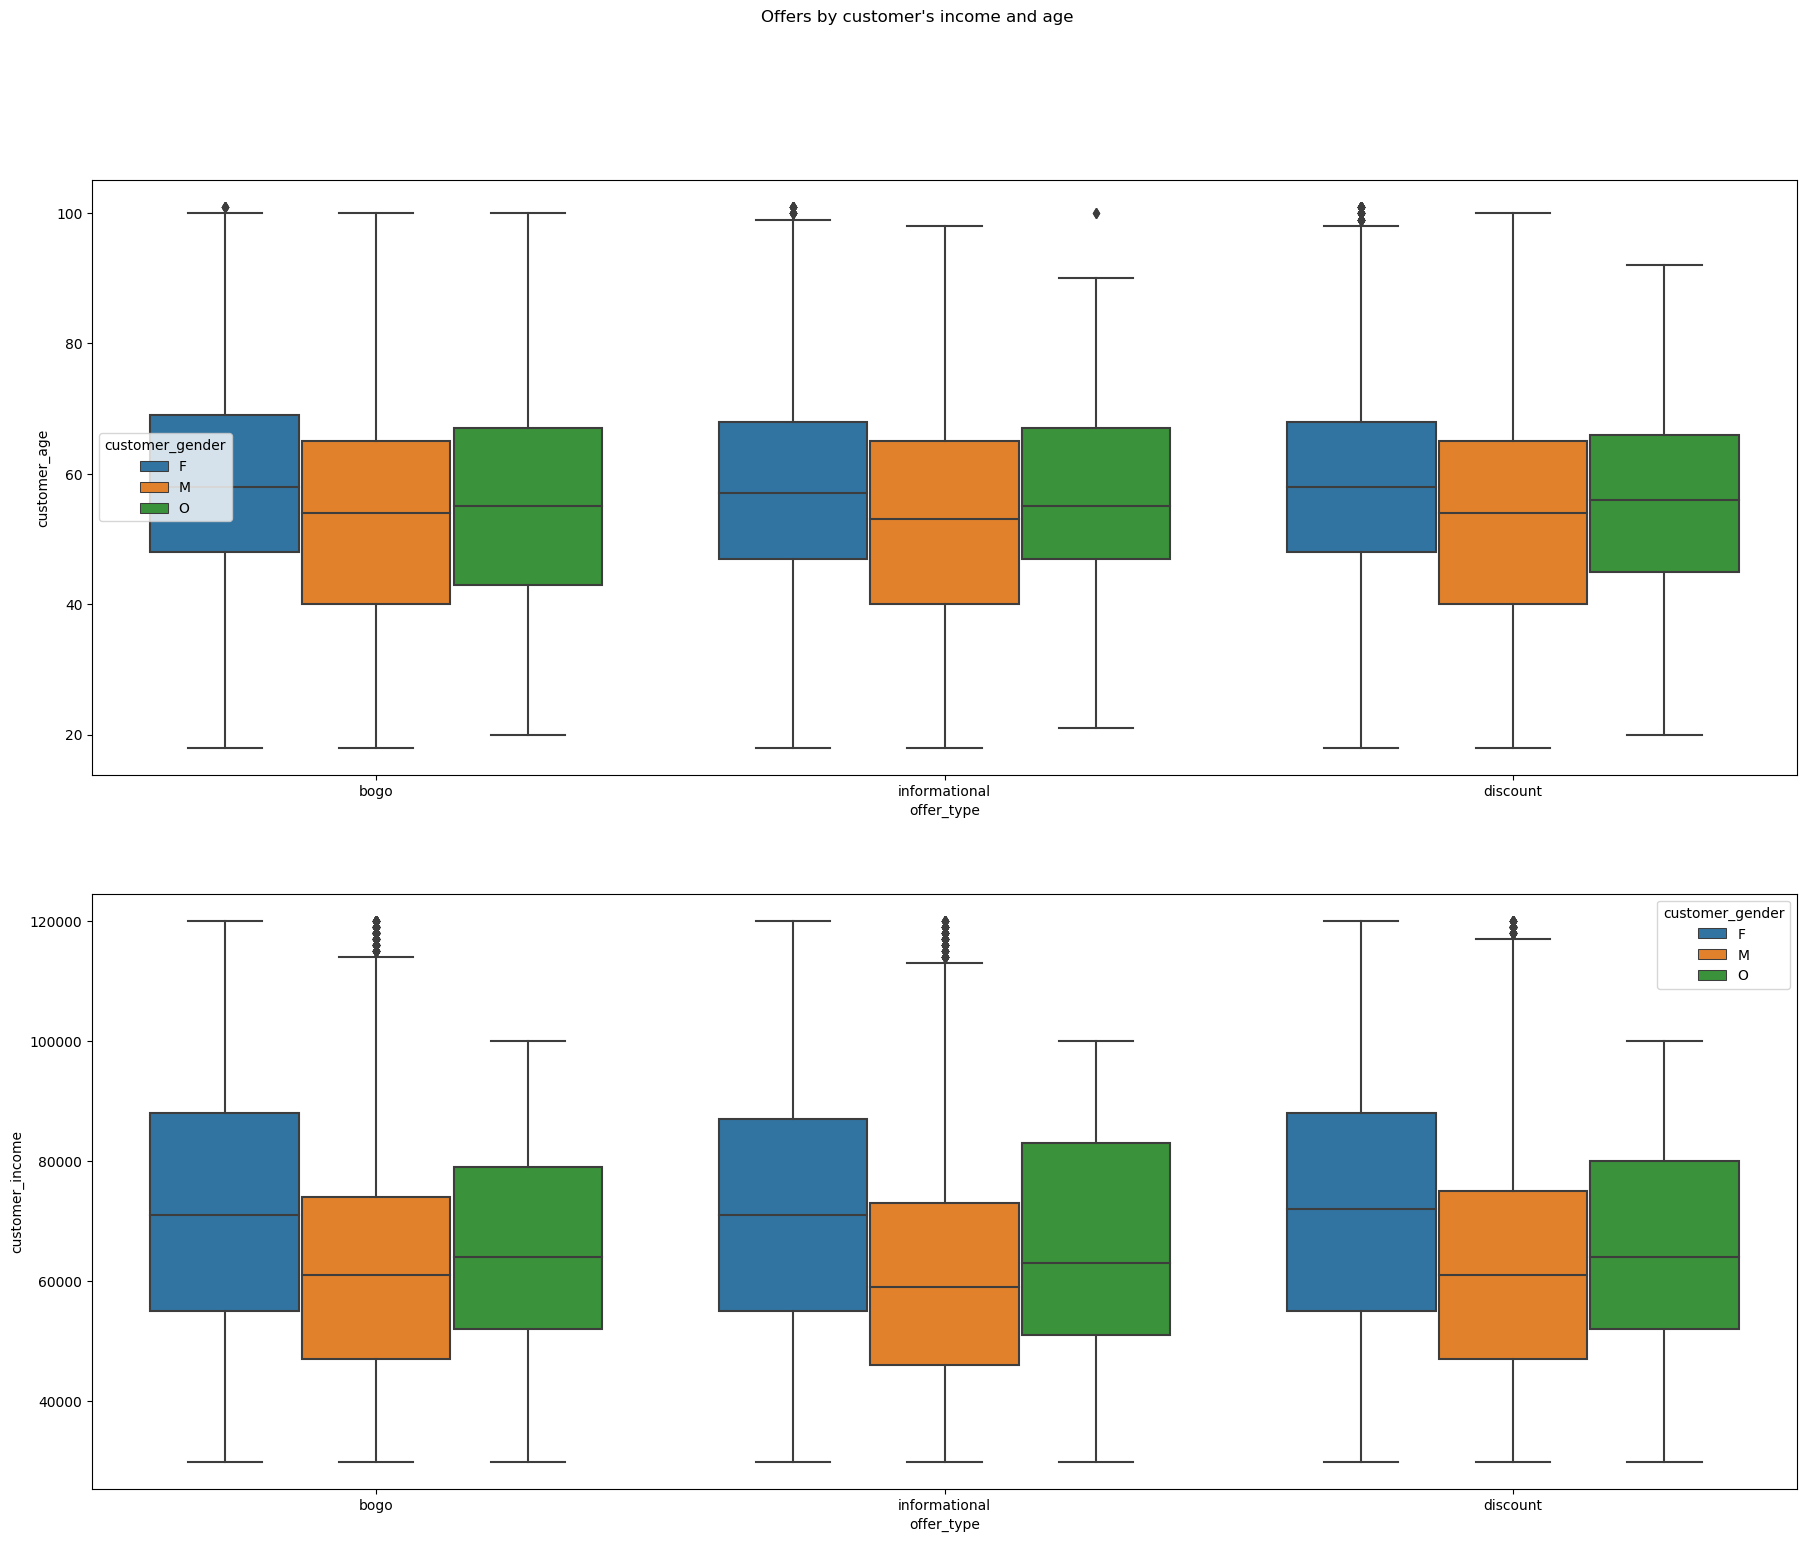

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(22, 17))

fig.suptitle("Offers by customer's income and age")

sns.boxplot(ax=axes[0], data=prepared_df, x='offer_type', y='customer_age', hue = 'customer_gender')
sns.boxplot(ax=axes[1], data=prepared_df, x='offer_type', y='customer_income',hue = 'customer_gender')

In [63]:
prepared_df.groupby(['offer_type']).median()

,time,reward,amount,offer_difficulty,offer_duration,offer_reward,customer_age,customer_income
offer_type,,,,,,,,
bogo,408,0.0,0.0,10,5,10,56,65000.0
discount,408,0.0,0.0,10,7,2,56,65000.0
informational,402,0.0,0.0,0,3,0,55,64000.0


In [64]:
prepared_df.groupby(['offer_type','customer_gender']).median()

time  reward  amount  offer_difficulty  \
offer_type    customer_gender                                           
bogo          F                 408     0.0     0.0                10   
              M                 408     0.0     0.0                10   
              O                 408     0.0     0.0                 5   
discount      F                 408     0.0     0.0                10   
              M                 408     0.0     0.0                10   
              O                 390     0.0     0.0                10   
informational F                 408     0.0     0.0                 0   
              M                 396     0.0     0.0                 0   
              O                 384     0.0     0.0                 0   

                               offer_duration  offer_reward  customer_age  \
offer_type    customer_gender                                               
bogo          F                             5            10            58   
              M                             5            10            54   
              O                             7             5            55   
discount      F                             7             2            58   
              M                             7             2            54   
              O                             7             3            56   
informational F                             3             0            57   
              M                             3             0            53   
              O                             3             0            55   

                               customer_income  
offer_type    customer_gender                   
bogo          F                        71000.0  
              M                        61000.0  
              O                        64000.0  
discount      F                        72000.0  
              M                        61000.0  
              O                        64000.0  
informational F                        71000.0  
              M                        59000.0  
              O                        63000.0

##### Findings:
We have more presence of the same age groups on the offer types, however, BOGO and discount offers are more submitted by the app.

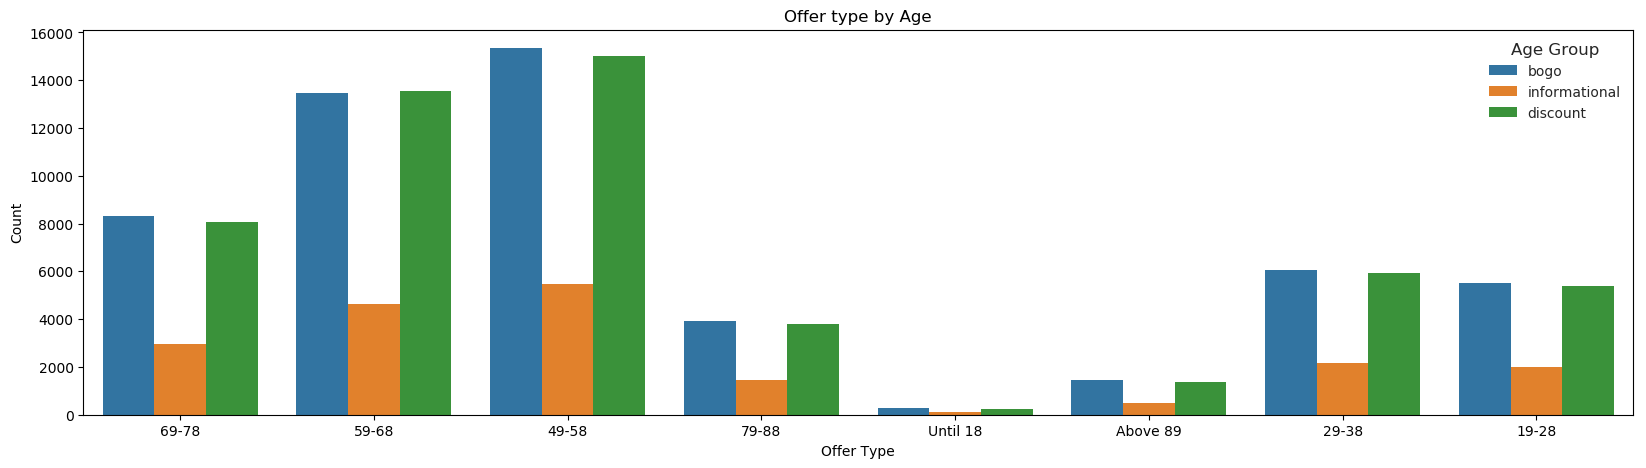

In [65]:
plt.figure(figsize=(20, 5))
sns.countplot(x= "age_group", hue= "offer_type", data=prepared_df)
sns.set(style="whitegrid")
plt.title('Offer type by Age')
plt.ylabel('Count')
plt.xlabel('Offer Type')
plt.legend(title='Age Group')

##### Findings:
'BOGO' (Buy-One-Get-One) and 'Discount' have similar distributions over submitted offers to the customers with median customer age user of 56 general and having some upper outliers on age for some group genders, and having male genders presenting upper outliers to its income.

#### Reward based on age distribution:

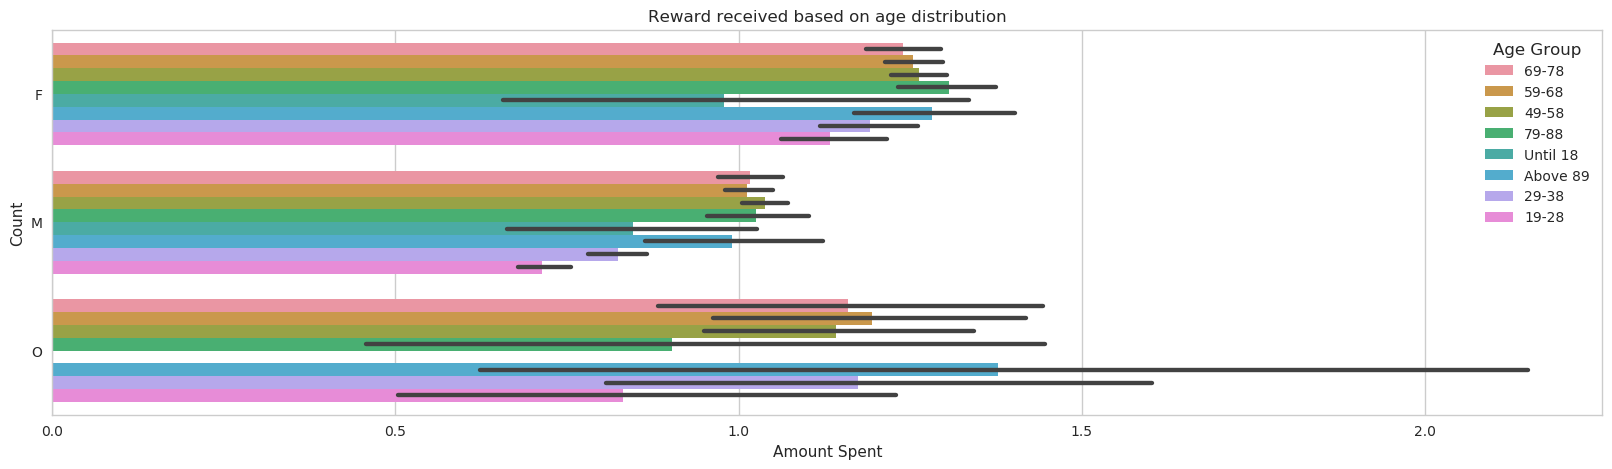

In [66]:
plt.figure(figsize=(20, 5))
sns.barplot(x= "reward",y = 'customer_gender', hue= "age_group", data=prepared_df)
sns.set(style="whitegrid")
plt.title('Reward received based on age distribution')
plt.ylabel('Count')
plt.xlabel('Amount Spent')
plt.legend(title='Age Group')

We can see for as general user case, it's enabled to say that users over 30 years holds more rewards received by completing offers. Females between 79 and 88, non-binary users above 89, and males between 49 and 58 have the most rewards prized by the app. This step leads us to analyse the events related.

#### Event by Age:

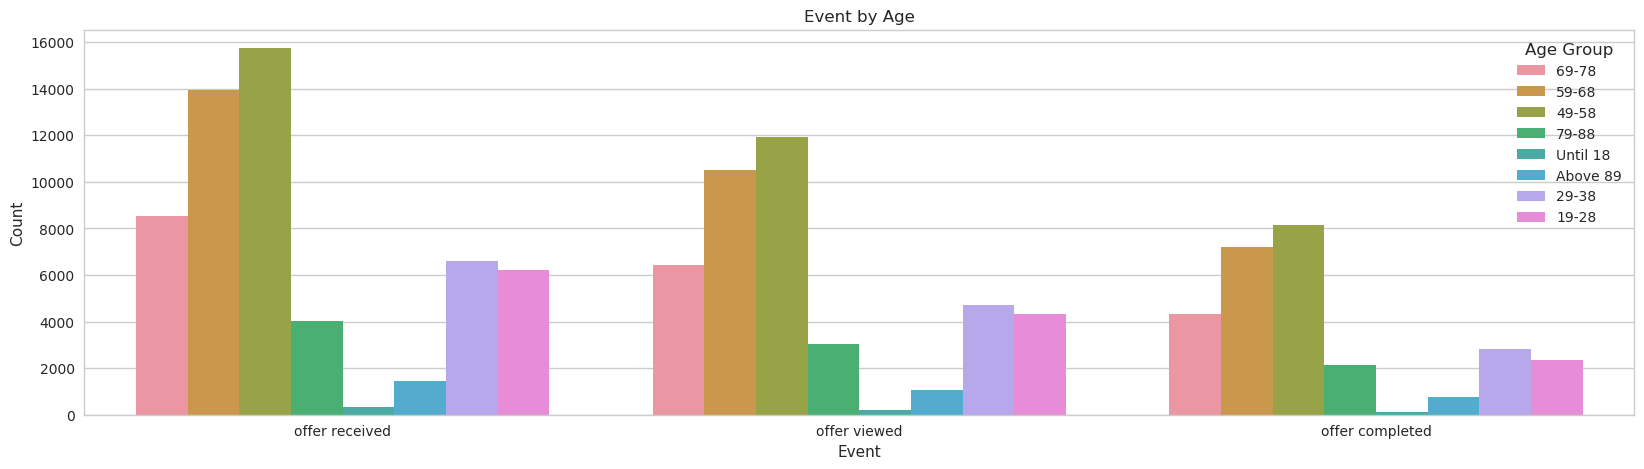

In [67]:
plt.figure(figsize=(20, 5))
sns.countplot(x= "event", hue= "age_group", data=prepared_df)
sns.set(style="whitegrid")
plt.title('Event by Age')
plt.ylabel('Count')
plt.xlabel('Event')
plt.legend(title='Age Group')

##### Findings:
People between 56 and 65 years tend to receive more, view more and complete more offers as well as it's possible to correlate it to the higher amount spent previouly shown.

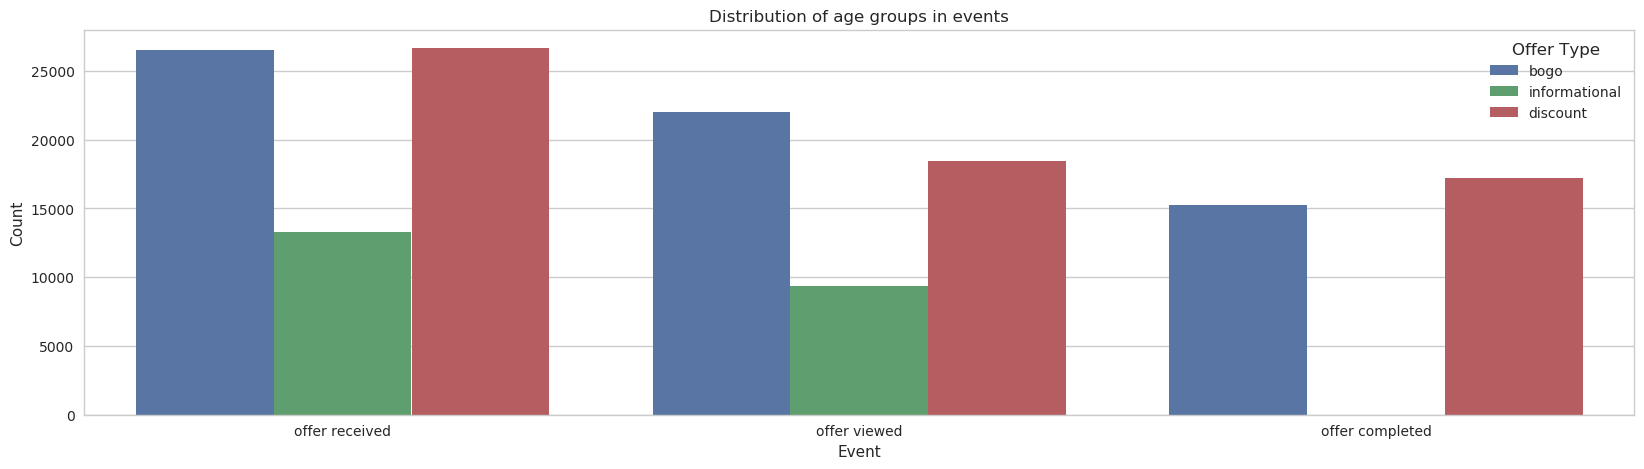

In [68]:
plt.figure(figsize=(20, 5))
sns.countplot(x= "event", hue= "offer_type", data=prepared_df)
sns.set(style="whitegrid")
plt.title('Distribution of age groups in events')
plt.ylabel('Count')
plt.xlabel('Event')
plt.legend(title='Offer Type')

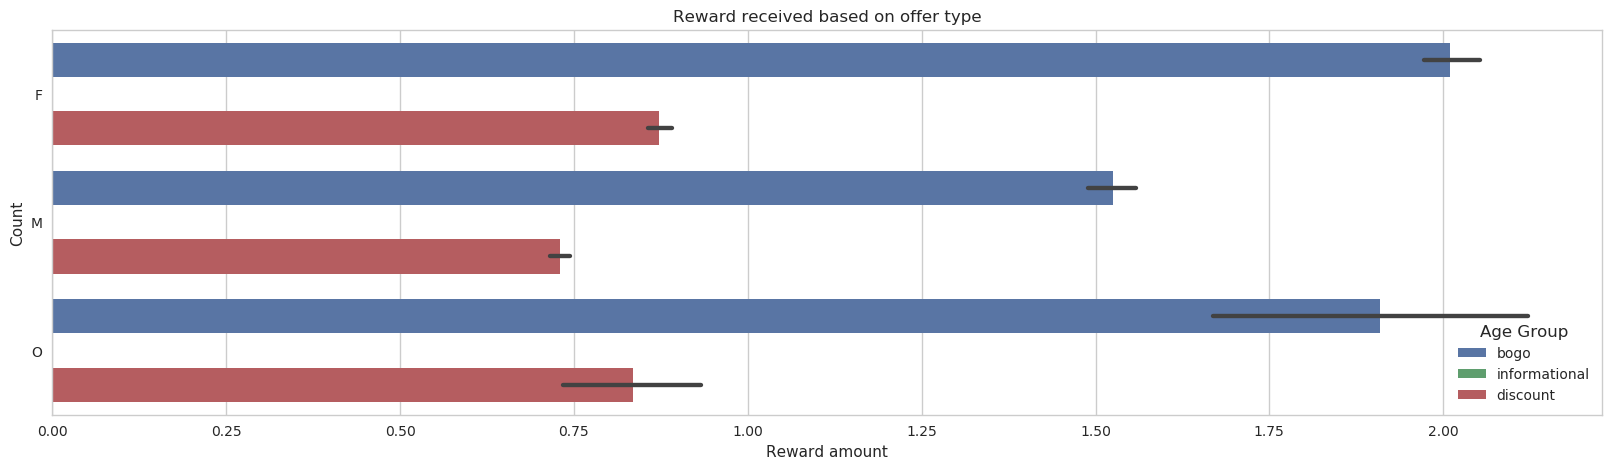

In [69]:
plt.figure(figsize=(20, 5))
sns.barplot(x= "reward",y = 'customer_gender', hue= "offer_type", data=prepared_df)
sns.set(style="whitegrid")
plt.title('Reward received based on offer type')
plt.ylabel('Count')
plt.xlabel('Reward amount')
plt.legend(title='Age Group')

In General people in this dataset, people between 49 and 58 followed by people of age between 59-68 are the most frequent users also completing offers. Events considering the 'bogo' offers have more rewards.

### C.2) Feature Engineering

With some possible compreenhesion from the final dataset, the feature engineer must be done to enable the modeling. For that it is needed to follow some steps:

In [70]:
offers_encode = {'bogo': 0, 'discount': 1, 'informational': 2}
prepared_df['offer_type'] = prepared_df['offer_type'].map(offers_encode)

gender_encode = {'M': 0,'O':1,'F':2}
prepared_df['customer_gender'] = prepared_df['customer_gender'].map(gender_encode)

Encoded offers in order to to have a clean classitory analysis

In [71]:
prepared_df.head(5)

,event,customer_id,time,offer_id,reward,amount,channels,offer_difficulty,offer_duration,offer_type,offer_reward,customer_age,became_member_on,customer_gender,customer_income,age_group
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,"[web, email, mobile]",5,7,0,5,75,2017-05-09,2,100000.0,69-78
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,"[web, email, mobile]",5,7,0,5,75,2017-05-09,2,100000.0,69-78
2,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,0.0,"[web, email, mobile]",5,7,0,5,75,2017-05-09,2,100000.0,69-78
3,offer received,78afa995795e4d85b5d9ceeca43f5fef,504,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0.0,"[web, email, mobile, social]",5,5,0,5,75,2017-05-09,2,100000.0,69-78
4,offer completed,78afa995795e4d85b5d9ceeca43f5fef,510,f19421c1d4aa40978ebb69ca19b0e20d,5.0,0.0,"[web, email, mobile, social]",5,5,0,5,75,2017-05-09,2,100000.0,69-78


To better modeling, it will be needed to create dummy variables to channel types and events. Also, a standardization must be done when splitted to train and test datasets.

In [72]:
dummy_channels = pd.get_dummies(prepared_df.channels.apply(pd.Series).stack()).sum(level=0)
feature_df = pd.concat([prepared_df, dummy_channels], axis = 1)
feature_df = feature_df.drop(columns='channels')

In [73]:
feature_df.head(5)

,event,customer_id,time,offer_id,reward,amount,offer_difficulty,offer_duration,offer_type,offer_reward,customer_age,became_member_on,customer_gender,customer_income,age_group,email,mobile,social,web
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,5,7,0,5,75,2017-05-09,2,100000.0,69-78,1,1,0,1
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,5,7,0,5,75,2017-05-09,2,100000.0,69-78,1,1,0,1
2,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,0.0,5,7,0,5,75,2017-05-09,2,100000.0,69-78,1,1,0,1
3,offer received,78afa995795e4d85b5d9ceeca43f5fef,504,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0.0,5,5,0,5,75,2017-05-09,2,100000.0,69-78,1,1,1,1
4,offer completed,78afa995795e4d85b5d9ceeca43f5fef,510,f19421c1d4aa40978ebb69ca19b0e20d,5.0,0.0,5,5,0,5,75,2017-05-09,2,100000.0,69-78,1,1,1,1


In [74]:
dummy_events = pd.get_dummies(feature_df.event)
feature_df = pd.concat([feature_df,dummy_events], axis = 1)


In [75]:
events_encode = {'offer received': 0, 'offer viewed': 1, 'offer completed': 2}
prepared_df['offer_type'] = prepared_df['offer_type'].map(offers_encode)


In [76]:
feature_df['events_id'] = prepared_df['event'].map(events_encode) 

In [77]:
dummy_age_g = pd.get_dummies(feature_df.age_group)
feature_df = pd.concat([feature_df,dummy_age_g], axis = 1)

In [78]:
feature_df.head(5)

,event,customer_id,time,offer_id,reward,amount,offer_difficulty,offer_duration,offer_type,offer_reward,...,offer viewed,events_id,19-28,29-38,49-58,59-68,69-78,79-88,Above 89,Until 18
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,5,7,0,5,...,0,0,0,0,0,0,1,0,0,0
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,5,7,0,5,...,1,1,0,0,0,0,1,0,0,0
2,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,0.0,5,7,0,5,...,0,2,0,0,0,0,1,0,0,0
3,offer received,78afa995795e4d85b5d9ceeca43f5fef,504,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0.0,5,5,0,5,...,0,0,0,0,0,0,1,0,0,0
4,offer completed,78afa995795e4d85b5d9ceeca43f5fef,510,f19421c1d4aa40978ebb69ca19b0e20d,5.0,0.0,5,5,0,5,...,0,2,0,0,0,0,1,0,0,0


to a better correlation matrix to be created, it will be applied the scalling for the metric fields:

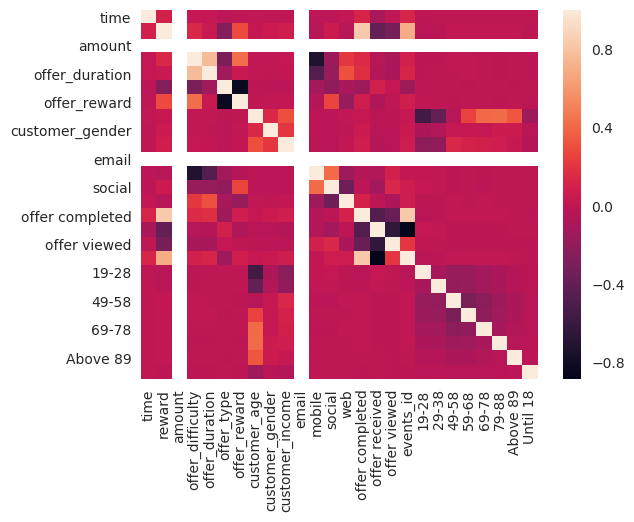

In [79]:
corrMatrix = feature_df.corr()
sns.heatmap(corrMatrix)
plt.show()

In [80]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 148804
Data columns (total 31 columns):
event               148805 non-null object
customer_id         148805 non-null object
time                148805 non-null int64
offer_id            148805 non-null object
reward              148805 non-null float64
amount              148805 non-null float64
offer_difficulty    148805 non-null int64
offer_duration      148805 non-null int64
offer_type          148805 non-null int64
offer_reward        148805 non-null int64
customer_age        148805 non-null int64
became_member_on    148805 non-null datetime64[ns]
customer_gender     148805 non-null int64
customer_income     148805 non-null float64
age_group           126955 non-null object
email               148805 non-null uint8
mobile              148805 non-null uint8
social              148805 non-null uint8
web                 148805 non-null uint8
offer completed     148805 non-null uint8
offer received      148805 non

As observed on the correlational matrix, only the following variables have a significable relation:
* reward;
* offer_difficulty;
* offer_duration;
* offer_type;
* offer_reward;
* customer_age;
* customer_gender;
* customer_income;
* email;
* web.


The age groups,offer completed,offer received, and offer viewed will not be used in the model and will be dropped with the id of each dimensional dataset merged, yet it helped us into the EDA phase.


In [81]:
X = feature_df.drop(['customer_id','offer_id', 'events_id' , 'event' , 'became_member_on','offer completed', 'offer received',
       'offer viewed','age_group','19-28','29-38','49-58','59-68','69-78','79-88','Above 89','Until 18'], axis=1)
Y = feature_df['events_id']

In [82]:
X.head(5)

,time,reward,amount,offer_difficulty,offer_duration,offer_type,offer_reward,customer_age,customer_gender,customer_income,email,mobile,social,web
0,0,0.0,0.0,5,7,0,5,75,2,100000.0,1,1,0,1
1,6,0.0,0.0,5,7,0,5,75,2,100000.0,1,1,0,1
2,132,5.0,0.0,5,7,0,5,75,2,100000.0,1,1,0,1
3,504,0.0,0.0,5,5,0,5,75,2,100000.0,1,1,1,1
4,510,5.0,0.0,5,5,0,5,75,2,100000.0,1,1,1,1


In [83]:
Y.unique()

array([0, 1, 2])

In [84]:
X.shape, Y.shape

((148805, 14), (148805,))

## D) Data Split and Models train

To ensure the model scale, it will be applied normalization to fit the values rescaled to the dataset ranging from 0 to 1 with the standarization where the mean will be centered by a unit stardard deviation. With that, the mean will be zero and the result of the distribution will have one standard deviation unit.

In [85]:
#split the dataset into test and train sets.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [86]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89283, 14), (59522, 14), (89283,), (59522,))

In [87]:
std = StandardScaler()

The model considered will related channel types and event with age and its age groups. It will be removed reward,customer income, amount spent, offer time, the date the customer registered in the app database, and identification fields. The Age_group dummies will be removed because the age shows a strong direct relation that its dummies to the customer income. Thus,


In [88]:
X_train.customer_income = std.fit_transform(X_train.customer_income.values.reshape(-1, 1))
X_train.customer_age = std.fit_transform(X_train.customer_age.values.reshape(-1, 1))
X_train.time = std.fit_transform(X_train.time.values.reshape(-1, 1))
X_train.reset_index(inplace=True)
X_train = X_train.drop(['index'], axis=1)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [89]:
X_train.head()

,time,reward,amount,offer_difficulty,offer_duration,offer_type,offer_reward,customer_age,customer_gender,customer_income,email,mobile,social,web
0,0.266426,0.0,0.0,0,3,2,0,-0.218725,2,-0.766628,1,1,1,0
1,0.266426,0.0,0.0,7,7,1,3,-1.558664,2,-0.441499,1,1,1,1
2,-1.609273,10.0,0.0,10,5,0,10,-0.510016,2,-0.580840,1,1,1,1
3,0.750477,0.0,0.0,10,10,1,2,0.305600,2,0.719673,1,1,1,1
4,-0.641171,5.0,0.0,5,7,0,5,-0.160466,2,-0.766628,1,1,0,1


Transformming the train and test dataframes to numpy array for usage into the models

In [90]:

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [91]:
X_train.shape, X_test.shape

((89283, 14), (59522, 14))

## E) Models application and evalutation 

With the train and test datasets splitted, it will be possible to use them into the models proposed. The models will be pipelined and trained based on the scikit learn pipeline method to enable multiple models usage.
The pipeline can be used as any other estimator and avoids leaking the test set into the train set.

In [92]:
## Model with the PCA Analysis into the data pipeline included to the RFC
model = Pipeline([
                    ('pca', PCA()),
                    ('clf', RandomForestClassifier(warm_start=True))
                 ])
model

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
         ...timators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True))])

In [93]:
## Model without the PCA Analysis into the data pipeline included to the RFC
model_2 = Pipeline([ 
                 ('clf', RandomForestClassifier(warm_start=True))])
model_2

Pipeline(memory=None,
     steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True))])

In [94]:
## Naive Bayes Model
model_3 = Pipeline([ 
                 ('clf', MultinomialNB())])
model_3

Pipeline(memory=None,
     steps=[('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### E.1) Fiting the models

In [95]:
model.fit(X,Y)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
         ...timators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True))])

In [96]:
model_2.fit(X,Y)

Pipeline(memory=None,
     steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True))])

In [97]:
model_3.fit(X,Y)

Pipeline(memory=None,
     steps=[('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### E.2) Evalutating the results

In [98]:
scores = cross_validate(model, X, Y, cv=5, 
                        scoring=['accuracy','f1_macro','f1_weighted'], return_train_score=True)
scores

{'fit_time': array([ 5.58237028,  5.60107875,  5.50229406,  5.39334822,  5.03723264]),
 'score_time': array([ 0.21873331,  0.23357439,  0.22692966,  0.24790239,  0.22930169]),
 'test_accuracy': array([ 0.8742356 ,  0.90910924,  0.89395518,  0.88962064,  0.88014113]),
 'train_accuracy': array([ 0.92665675,  0.92740499,  0.92820302,  0.92979067,  0.93016926]),
 'test_f1_macro': array([ 0.88323495,  0.91871159,  0.90449032,  0.90160242,  0.89364553]),
 'train_f1_macro': array([ 0.93547066,  0.93611768,  0.93687906,  0.93830965,  0.93865419]),
 'test_f1_weighted': array([ 0.86864107,  0.90760087,  0.89167467,  0.8880326 ,  0.87878114]),
 'train_f1_weighted': array([ 0.92621593,  0.92696098,  0.92780407,  0.929424  ,  0.9298129 ])}

In [99]:
scores_2 = cross_validate(model_2, X, Y, cv=5, 
                          scoring=['accuracy','f1_macro','f1_weighted'], return_train_score=True)
scores_2

{'fit_time': array([ 1.42660022,  1.33210731,  1.33365965,  1.43591428,  1.48571563]),
 'score_time': array([ 0.24419904,  0.31910658,  0.23397017,  0.26067877,  0.23700261]),
 'test_accuracy': array([ 0.85165647,  0.8618998 ,  0.86448708,  0.85954773,  0.85756048]),
 'train_accuracy': array([ 0.92468268,  0.92512012,  0.92606095,  0.92800981,  0.92806082]),
 'test_f1_macro': array([ 0.86124878,  0.8745843 ,  0.876959  ,  0.87420087,  0.87300761]),
 'train_f1_macro': array([ 0.93376447,  0.93417707,  0.93504586,  0.93678283,  0.93680169]),
 'test_f1_weighted': array([ 0.84417703,  0.85809931,  0.86077816,  0.8570743 ,  0.85549679]),
 'train_f1_weighted': array([ 0.92425084,  0.9247097 ,  0.92568378,  0.92765926,  0.92769353])}

In [100]:
scores_3 = cross_validate(model_3, X, Y, cv=5, 
                          scoring=['accuracy','f1_macro','f1_weighted'], return_train_score=True)
scores_3

{'fit_time': array([ 0.03390837,  0.03328466,  0.03326249,  0.03393173,  0.03512836]),
 'score_time': array([ 0.02064252,  0.02106118,  0.02123833,  0.02173352,  0.02159667]),
 'test_accuracy': array([ 0.47375848,  0.46991029,  0.47555526,  0.46167804,  0.46377688]),
 'train_accuracy': array([ 0.45901901,  0.47895736,  0.47063271,  0.4735896 ,  0.46408501]),
 'test_f1_macro': array([ 0.4362242 ,  0.44734195,  0.44179443,  0.43547022,  0.43443917]),
 'train_f1_macro': array([ 0.42466062,  0.45342726,  0.44149826,  0.44473702,  0.4305061 ]),
 'test_f1_weighted': array([ 0.43317666,  0.43831043,  0.43630369,  0.4301031 ,  0.42890916]),
 'train_f1_weighted': array([ 0.42058158,  0.44621801,  0.43565222,  0.43868564,  0.42619217])}

In [101]:
scores_df = pd.DataFrame(scores)
scores_df.mean()*100

fit_time             542.326479
score_time            23.128829
test_accuracy         88.941236
train_accuracy        92.844494
test_f1_macro         90.033696
train_f1_macro        93.708625
test_f1_weighted      88.694607
train_f1_weighted     92.804358
dtype: float64

In [102]:
scores_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,5.423265,0.230810,5.037233,5.393348,5.502294,5.582370,5.601079
score_time,5.0,0.231288,0.010745,0.218733,0.226930,0.229302,0.233574,0.247902
test_accuracy,5.0,0.889412,0.013462,0.874236,0.880141,0.889621,0.893955,0.909109
train_accuracy,5.0,0.928445,0.001510,0.926657,0.927405,0.928203,0.929791,0.930169
test_f1_macro,5.0,0.900337,0.013169,0.883235,0.893646,0.901602,0.904490,0.918712
train_f1_macro,5.0,0.937086,0.001374,0.935471,0.936118,0.936879,0.938310,0.938654
test_f1_weighted,5.0,0.886946,0.014594,0.868641,0.878781,0.888033,0.891675,0.907601
train_f1_weighted,5.0,0.928044,0.001550,0.926216,0.926961,0.927804,0.929424,0.929813


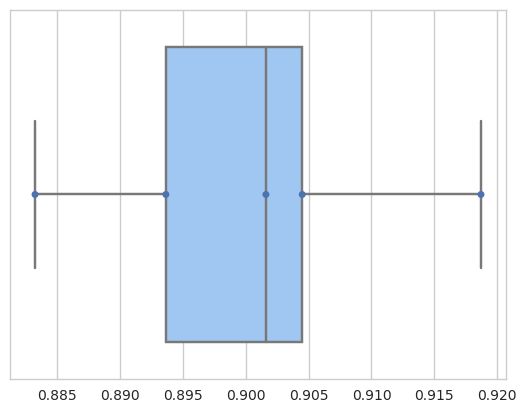

In [103]:
sns.boxplot(scores['test_f1_macro'], palette='pastel');
sns.stripplot(scores['test_f1_macro']);

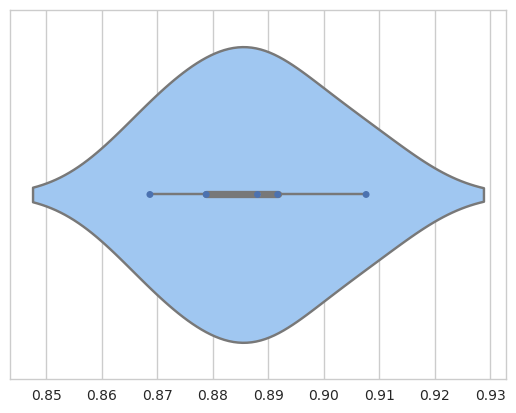

In [104]:
sns.violinplot(scores['test_f1_weighted'], palette='pastel');
sns.stripplot(scores['test_f1_weighted']);

In [105]:
scores_2_df = pd.DataFrame(scores_2)
scores_2_df.mean()*100

fit_time             140.279942
score_time            25.899143
test_accuracy         85.903031
train_accuracy        92.638688
test_f1_macro         87.200011
train_f1_macro        93.531439
test_f1_weighted      85.512512
train_f1_weighted     92.599942
dtype: float64

In [106]:
scores_2_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,1.402799,0.067668,1.332107,1.333660,1.426600,1.435914,1.485716
score_time,5.0,0.258991,0.035161,0.233970,0.237003,0.244199,0.260679,0.319107
test_accuracy,5.0,0.859030,0.004869,0.851656,0.857560,0.859548,0.861900,0.864487
train_accuracy,5.0,0.926387,0.001585,0.924683,0.925120,0.926061,0.928010,0.928061
test_f1_macro,5.0,0.872000,0.006179,0.861249,0.873008,0.874201,0.874584,0.876959
train_f1_macro,5.0,0.935314,0.001426,0.933764,0.934177,0.935046,0.936783,0.936802
test_f1_weighted,5.0,0.855125,0.006415,0.844177,0.855497,0.857074,0.858099,0.860778
train_f1_weighted,5.0,0.925999,0.001616,0.924251,0.924710,0.925684,0.927659,0.927694


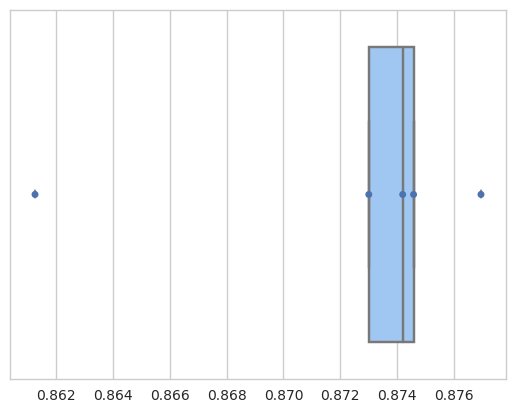

In [107]:
sns.boxplot(scores_2['test_f1_macro'], palette='pastel');
sns.stripplot(scores_2['test_f1_macro']);

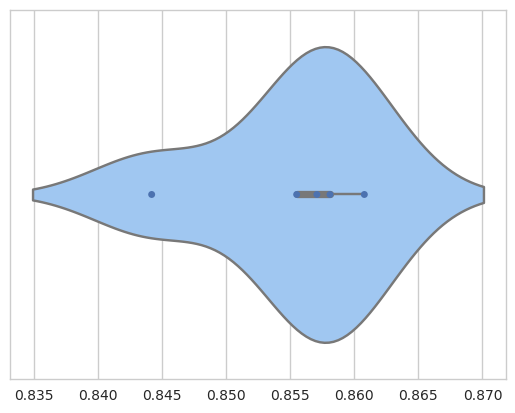

In [108]:
sns.violinplot(scores_2['test_f1_weighted'], palette='pastel');
sns.stripplot(scores_2['test_f1_weighted']);

In [109]:
scores_3_df = pd.DataFrame(scores_3)
scores_3_df.mean()*100

fit_time              3.390312
score_time            2.125444
test_accuracy        46.893579
train_accuracy       46.925674
test_f1_macro        43.905399
train_f1_macro       43.896585
test_f1_weighted     43.336061
train_f1_weighted    43.346592
dtype: float64

In [114]:
scores_3_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,0.033903,0.000757,0.033262,0.033285,0.033908,0.033932,0.035128
score_time,5.0,0.021254,0.000436,0.020643,0.021061,0.021238,0.021597,0.021734
test_accuracy,5.0,0.468936,0.006069,0.461678,0.463777,0.469910,0.473758,0.475555
train_accuracy,5.0,0.469257,0.007847,0.459019,0.464085,0.470633,0.473590,0.478957
test_f1_macro,5.0,0.439054,0.005439,0.434439,0.435470,0.436224,0.441794,0.447342
train_f1_macro,5.0,0.438966,0.011457,0.424661,0.430506,0.441498,0.444737,0.453427
test_f1_weighted,5.0,0.433361,0.003988,0.428909,0.430103,0.433177,0.436304,0.438310
train_f1_weighted,5.0,0.433466,0.010168,0.420582,0.426192,0.435652,0.438686,0.446218


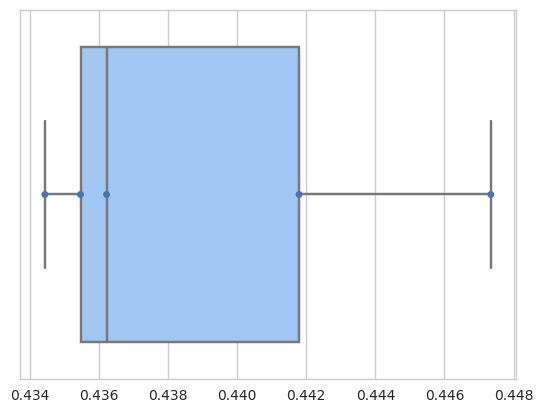

In [115]:
sns.boxplot(scores_3['test_f1_macro'], palette='pastel');
sns.stripplot(scores_3['test_f1_macro']);

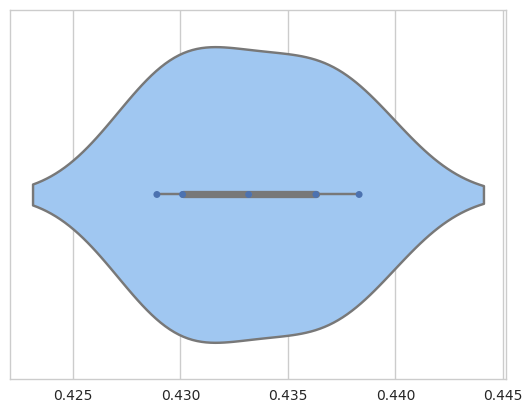

In [116]:
sns.violinplot(scores_3['test_f1_weighted'], palette='pastel');
sns.stripplot(scores_3['test_f1_weighted']);

## E) Final Considerations

In this session the scores will be discussed in order to analyze the obtained F1 results, benchmarking it in order to a final conclusion.

## E.1) Proposal considerations

Analysing the F1 scores of model 1 (the Random forest Classifier with the PCA Analysis) and the model 2 (The Random Forest Classifier without the PCA Analysis), it is possible to say that they both have overall results. However, the model 1 presents more accuracy over the results than the non reduced model (model 2).Comparing the model 1 and 2 with the model 3 (which is the Naive Bayes classifier), the results are much more accurate as expected because of the Random forest classifier expected better result with multiple attributes.

## E.2) Future work

For Future work, it will be very interessting to test other models like the SVC (Support Vector Classifier) as it is a problem that consider multiple variables to the estimator. It was considered but removed from the study the usage of SVC classifier due to machine limitation. It was used the Udacity's embedded workspace for this implementation, thus it wasn't possible to test different machine specifications. Another Structure that could be tested is multiple pipelines in a way to refine the results, yet they presented a good ratio.